In [1]:
import requests as r
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time
import random
import math 
import os
import re


pd.options.display.max_rows = None
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataframe_raw.csv').drop(columns=['Unnamed: 0'])

df.head()

,Player,tm_code,position,season,mv,club,last_season_before_transfer,next_season_mv,Age,Starts,Min,Gls,Ast,CrdY,CrdR,SoT,G/Sh,passing_Att,passing_Cmp%,TklW,Blocks,Int,Clr,dribbles_Att,Carries,Rec,league_place,cl_place,cup_place,Save%_gk,Cmp%_gk,OPA/90_gk
0,Stephan Lichtsteiner,2865,defence,2018,1500000.0,Arsenal FC,1,800000.0,34.0,19.0,1731.0,1.0,1.0,5.0,0.0,1.0,0.11,930.0,77.1,13.0,17.0,15.0,35.0,8.0,515.0,697.0,5,0.0,8,0.0,0.0,0.0
1,James Milner,3333,midfield,2018,15000000.0,Liverpool FC,0,6500000.0,32.0,31.0,2837.0,7.0,6.0,9.0,1.0,8.0,0.06,2262.0,79.3,37.0,55.0,28.0,43.0,27.0,1562.0,1722.0,2,1.0,32,0.0,0.0,0.0
2,James Milner,3333,midfield,2019,6500000.0,Liverpool FC,0,3000000.0,33.0,17.0,1656.0,4.0,4.0,6.0,0.0,6.0,0.06,1223.0,84.1,25.0,17.0,13.0,18.0,18.0,933.0,989.0,1,16.0,8,0.0,0.0,0.0
3,James Milner,3333,midfield,2020,3000000.0,Liverpool FC,0,2000000.0,34.0,19.0,1760.0,0.0,1.0,6.0,0.0,4.0,0.00,1178.0,82.3,33.0,37.0,22.0,20.0,18.0,801.0,939.0,3,8.0,16,0.0,0.0,0.0
4,James Milner,3333,midfield,2021,2000000.0,Liverpool FC,0,1500000.0,35.0,14.0,1387.0,0.0,3.0,5.0,0.0,3.0,0.00,949.0,81.6,24.0,23.0,22.0,23.0,7.0,606.0,770.0,2,2.0,1,0.0,0.0,0.0


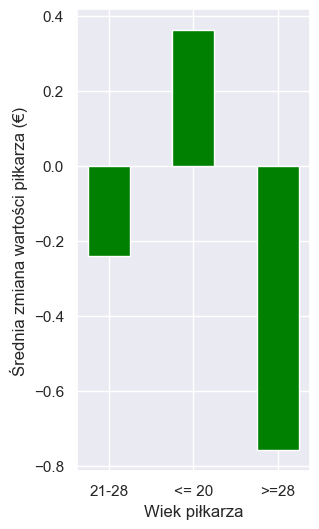

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

from matplotlib.pyplot import figure
figure(figsize=(3, 6), dpi=100)

data = df.copy()

data['mv_diff'] = data['next_season_mv'] - data['mv']
data['mv_diff'] = data['mv_diff'].apply(lambda x: 1 if x>0 else -1 if x<0 else 0)

data['Age_labels'] = data['Age'].apply(lambda x: '<= 20' if x<=20 else '21-28' if x<28 else '>=28')


data = data.groupby('Age_labels')['mv_diff'].mean().reset_index()

data

plt.bar(data['Age_labels'], data['mv_diff'], width=0.5, color='green')
plt.xticks(['<= 20','21-28','>=28'])
plt.ylabel('Średnia zmiana wartości piłkarza (€)')
plt.xlabel('Wiek piłkarza')

print()
print()
plt.show()

In [4]:
df_copp = df.copy()

print(df_copp.shape)
df_copp = df_copp[(df_copp['mv'] != 0) & (df_copp['next_season_mv'] != 0)] # odejmuje to ok. 200 rekordow
print(df_copp.shape)
# dataframe_raw = dataframe_raw[dataframe_raw['Min'] >= 90] # odejmuje to ok. 300 rekordow
# print(dataframe_raw.shape)

# ######
# dataframe_raw = dataframe_raw[dataframe_raw['mv'] >= 5000000] # odejmuje to ok. 550 rekordow
# print(dataframe_raw.shape)
# ######


df_copp.head()

(2048, 32)
(1805, 32)


,Player,tm_code,position,season,mv,club,last_season_before_transfer,next_season_mv,Age,Starts,Min,Gls,Ast,CrdY,CrdR,SoT,G/Sh,passing_Att,passing_Cmp%,TklW,Blocks,Int,Clr,dribbles_Att,Carries,Rec,league_place,cl_place,cup_place,Save%_gk,Cmp%_gk,OPA/90_gk
0,Stephan Lichtsteiner,2865,defence,2018,1500000.0,Arsenal FC,1,800000.0,34.0,19.0,1731.0,1.0,1.0,5.0,0.0,1.0,0.11,930.0,77.1,13.0,17.0,15.0,35.0,8.0,515.0,697.0,5,0.0,8,0.0,0.0,0.0
1,James Milner,3333,midfield,2018,15000000.0,Liverpool FC,0,6500000.0,32.0,31.0,2837.0,7.0,6.0,9.0,1.0,8.0,0.06,2262.0,79.3,37.0,55.0,28.0,43.0,27.0,1562.0,1722.0,2,1.0,32,0.0,0.0,0.0
2,James Milner,3333,midfield,2019,6500000.0,Liverpool FC,0,3000000.0,33.0,17.0,1656.0,4.0,4.0,6.0,0.0,6.0,0.06,1223.0,84.1,25.0,17.0,13.0,18.0,18.0,933.0,989.0,1,16.0,8,0.0,0.0,0.0
3,James Milner,3333,midfield,2020,3000000.0,Liverpool FC,0,2000000.0,34.0,19.0,1760.0,0.0,1.0,6.0,0.0,4.0,0.00,1178.0,82.3,33.0,37.0,22.0,20.0,18.0,801.0,939.0,3,8.0,16,0.0,0.0,0.0
4,James Milner,3333,midfield,2021,2000000.0,Liverpool FC,0,1500000.0,35.0,14.0,1387.0,0.0,3.0,5.0,0.0,3.0,0.00,949.0,81.6,24.0,23.0,22.0,23.0,7.0,606.0,770.0,2,2.0,1,0.0,0.0,0.0


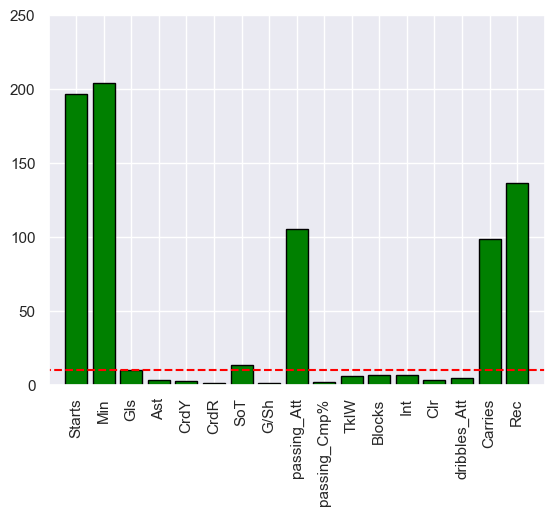

In [5]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()


cols = [
    'Starts', 'Min', 'Gls', 'Ast', 'CrdY', 'CrdR', 'SoT', 'G/Sh', 'passing_Att', 
    'passing_Cmp%', 'TklW', 'Blocks', 'Int', 'Clr', 'dribbles_Att', 'Carries', 'Rec'
]

r2_list = []
for col in cols:
    yes = df_copp[col]
    Xes = df_copp[cols].drop(columns=[col])

    lm = LinearRegression()
    lm.fit(Xes, yes)

    r2 = lm.score(Xes, yes)
    
    r2_list.append(1/(1-r2))
    
datalool = pd.DataFrame(dict(zip(cols, r2_list)), index=['VIF']).T.reset_index()


plt.bar(datalool['index'], datalool['VIF'], color='green', edgecolor='black')

plt.xticks(rotation=90)
plt.xlim(-1, len(cols))
plt.ylim(0, 250)

line_values = [x for x in range(-10, len(cols)+10)]
plt.plot(line_values, [10 for x in line_values], color='red', linestyle="--")

plt.show()

In [6]:
data = df_copp[cols].corr()['Min'].reset_index().rename(columns={'index':'variable', 'Min':'correlation'})
data

,variable,correlation
0,Starts,0.997374
1,Min,1.000000
2,Gls,0.469972
3,Ast,0.540340
4,CrdY,0.667123
5,CrdR,0.193729
6,SoT,0.532183
7,G/Sh,0.165274
8,passing_Att,0.880795
9,passing_Cmp%,0.514429


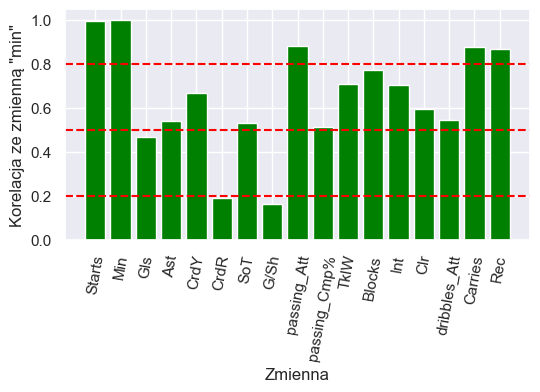

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(6, 3), dpi=100)

plt.bar(data['variable'], data['correlation'], color='green')

plt.ylabel('Korelacja ze zmienną "min"')
plt.xlabel('Zmienna')

plt.xlim(-1.2, len(cols)+0.2)
plt.xticks(rotation=80)
line_values = [x for x in range(-10, len(cols)+10)]
plt.plot(line_values, [0.2 for x in line_values], color='red', linestyle="--")
plt.plot(line_values, [0.5 for x in line_values], color='red', linestyle="--")
plt.plot(line_values, [0.8 for x in line_values], color='red', linestyle="--")

print()
print()
print()
print()
print()
print()
print()
print()
print()
print()
plt.show()

In [8]:
data = df_copp[cols]

data['label'] = data['Min'].apply(lambda x: '< 90' if x < 90 else '>= 90')

data = data.groupby('label').mean().T.reset_index().rename(columns={'index':'variable'})

print(0.081028/0.010069)
print(74.810547/19.301389)

data

8.047273810706129
3.8759151996781163


label,variable,< 90,>= 90
0,Starts,0.138889,21.096902
1,Min,15.406250,1908.302571
2,Gls,0.017361,3.043507
3,Ast,0.020833,2.172050
4,CrdY,0.020833,3.038893
5,CrdR,0.006944,0.102835
6,SoT,0.100694,8.864865
7,G/Sh,0.010069,0.081028
8,passing_Att,2.444444,925.794331
9,passing_Cmp%,19.301389,74.810547


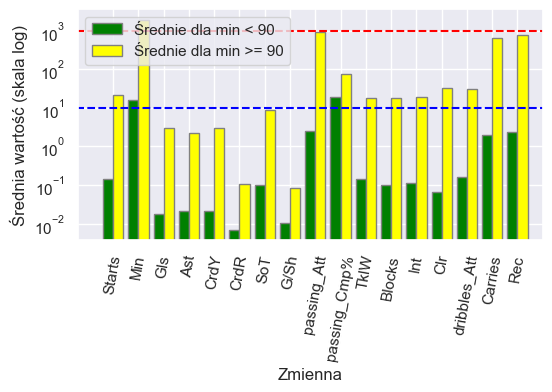

In [9]:
import matplotlib.pyplot as plt

figure(figsize=(6, 3), dpi=100)

categories = data['variable']
values1 = data['< 90']
values2 = data['>= 90']

bar_width = 0.4

r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]


plt.bar(r1, values1, color='green', width=bar_width, edgecolor='grey', label='Średnie dla min < 90')
plt.bar(r2, values2, color='yellow', width=bar_width, edgecolor='grey', label='Średnie dla min >= 90')

plt.xlabel('Zmienna')
plt.ylabel('Średnia wartość (skala log)')

plt.yscale('log')
plt.xticks(rotation=80)

# Add the x-axis labels
plt.xticks([r + bar_width / 2 for r in range(len(categories))], categories)

# Adding the legend
plt.legend()


plt.xlim(-1.2, len(cols)+0.2)
line_values = [x for x in range(-10, len(cols)+10)]
plt.plot(line_values, [10 for x in line_values], color='blue', linestyle="--")
plt.plot(line_values, [1000 for x in line_values], color='red', linestyle="--")


print()
print()
print()
print()
print()
print()
print()
print()
print()
print()
print()
print()

plt.show()
